Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 3: Osnove vjerojatnosti i statistike

(c) 2015 Jan Šnajder

<i>Verzija: 0.8 (2015-11-01)</i>

In [3]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.random import normal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Vjerojatnost

* Očekivanje, varijanca i kovarijanca

* Statistička nezavisnost

* Matrica kovarijacije

* Teorijske razdiobe

* Procjena parametara

* Procjenitelj MLE

* Procjenitelj MAP


# Vjerojatnost

* $X$ je slučajna varijabla, $\{x_i\}$ su njezine vrijednosti


* Pojednostavljenje notacije: $$P(X=x) \equiv P(x)$$


* $P(x_i)\geq 0$, $\sum_i P(x_i)=1$


* Distribucija (razdioba) vjerojatnosti


* Zajednička (engl. *joint*) distribucija nad $\{X,Y\}$: $$P(X=x,Y=y)\equiv P(x,y)$$
        
        
* Kontinuirana slučajna varijabla: **funkcija gustoće vjerojatnosti (PDF)**:

\begin{eqnarray*}
p(x) & \geq 0\\
\int_{-\infty}^{\infty} p(x)\,\textrm{d}x &= 1\\
P(a\leq X\leq b) &= \int_a^b p(x)\,\mathrm{d}x
\end{eqnarray*}

### Dva pravila teorije vjerojatnosti

* **(1) Pravilo zbroja**
$$P(x)=\sum_y P(x,y)$$
(Marginalna vjerojatnost varijable $X$)


* Uvjetna vjerojatnost:
$$
    P(y|x) = \frac{P(x,y)}{P(x)} 
$$


* **(2) Pravilo umnoška**
$$P(x,y) = P(y|x) P(x) = P(x|y) P(y)$$

### Izvedena pravila

* **Bayesovo pravilo**
$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
= \frac{P(x|y)P(y)}{\sum_y P(x,y)}
= \frac{P(x|y)P(y)}{\sum_y P(x|y)P(y)}
$$


* **Pravilo lanca (engl. *chain rule*)**
$$P(x,y,z) = P(x) P(y|x) P(z|x,y)$$

* Općenito:
$$
\begin{align*}
P(x_1,\dots,x_n) &=
P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)\cdots P(x_n|x_1,\dots,x_{n-1})\\
&= \prod_{k=1}^n P(x_k|x_1,\dots,x_{k-1})
\end{align*}
$$

# Očekivanje, varijanca i kovarijanca 

* Očekivanje slučajne varijable:

\begin{equation*}
\mathbb{E}[X]=\sum_x x P(x)
\end{equation*}

$$
\mathbb{E}[X]=\int_{-\infty}^{\infty} x\,p(x)\,\mathrm{d}x
$$

* Očekivanje funkcije slučajne varijable:

\begin{equation*}
\mathbb{E}[f]=\sum_x f(x) P(x)
\end{equation*}

* Vrijedi:

\begin{align*}
\mathbb{E}[aX+b] &= a\mathbb{E}[X]+b\qquad (a,b\in\mathbb{R})\\
\mathbb{E}[X+Y] &= \mathbb{E}[X] + \mathbb{E}[Y]
\end{align*}

* Varijanca slučajne varijable:

\begin{equation*}
\mathrm{Var}(X) = \sigma_X^2 = \mathbb{E}[(X-\mathbb{E}[X])^2] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
\end{equation*}

\begin{equation*}
\mathrm{Var}(a X) = \mathbb{E}\big[(a X)^2\big] - \mathbb{E}[a X]^2 = a^2\mathbb{E}[X^2] - a^2\mathbb{E}[X]^2 =
a^2\mathrm{Var}(X)
\end{equation*}

* Kovarijanca slučajnih varijabli:

\begin{align*}
    \mathrm{Cov}(X,Y) &= \sigma_{X,Y} = \mathbb{E}\big[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])\big] =
    \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]\\
   \mathrm{Cov}(X,Y) &=\mathrm{Cov}(Y, X)\\
   \mathrm{Cov}(X,X) &=\mathrm{Var}(X) =\sigma^2_X\\
\end{align*}

* Pearsonov koeficijent korelacije (linearna zavisnost):
$$
\rho_{X,Y} = \frac{\mathrm{Cov}(X,Y)}{\sigma_X\sigma_Y}
$$
$\rho_{X,Y}\in[-1,+1]$



In [2]:
from scipy import stats

X = sp.random.random(100)
Y0 = sp.random.random(100)
noise = stats.norm.rvs(size=100)
Y1 = X + 0.2 * noise
Y2 = 3 * Y1
Y3 = -Y1
Y4 = 1 - (X - 0.5)**2 + 0.05 * noise

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


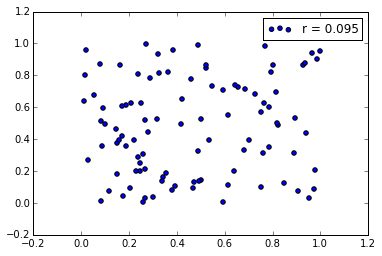

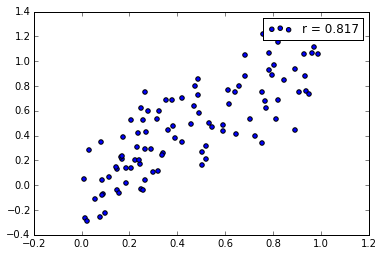

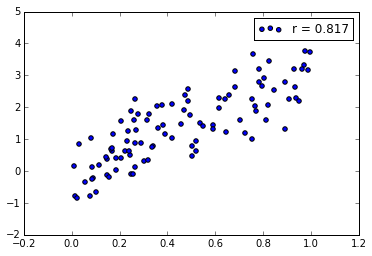

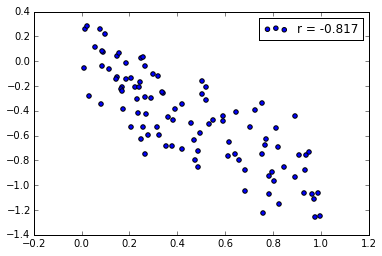

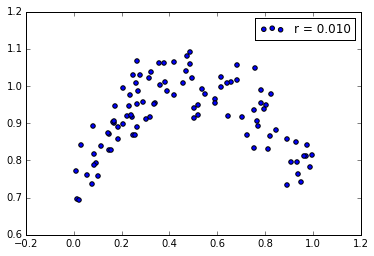

In [3]:
for Y in [Y0, Y1, Y2, Y3, Y4]:
    plt.scatter(X,Y, label="r = %.3f" % stats.pearsonr(X, Y)[0])
    plt.legend()
    plt.show()

* Linearno zavisne varijable imaju $\rho$ blizu $1$ ili $-1$. Međutim, **nelinearno** zavisne varijable mogu imati $\rho$ blizu nule!

# Statistička nezavisnost

* Varijable $X$ i $Y$ su **nezavisne** akko:
$$
P(X,Y) = P(X) P(Y)
$$
ili
$$
P(X|Y) = P(X) \qquad \text{i} \qquad P(Y|X) = P(Y)
$$


* Znanje o ishodu varijable $Y$ ne utječe na vjerojatnost ishoda varijable $X$ (i obrnuto)


* Za nezavisne varijable $X$ i $Y$ vrijedi:
$$
\begin{align*}
\mathbb{E}[XY] &= \mathbb{E}[X]\, \mathbb{E}[Y]\\
\mathrm{Var}(X+Y) &= \mathrm{Var}(X) + \mathrm{Var}(Y)\\
\mathrm{Cov}(X, Y) &= \rho_{X,Y} = 0
\end{align*}
$$

* Nezavisne varijable su nekorelirane, ali obrat općenito ne vrijedi: nelinarno zavisne varijable mogu imati nisku korelaciju


* Varijable $X$ i $Y$ su **uvjetno nezavisne** uz danu varijablu Z, što označavamo kao $X\bot Y|Z$, akko
$$
P(X|Y,Z) = P(X|Z)
$$
ili
$$
P(X,Y|Z) = P(X|Z) P(Y|Z)
$$

* Jednom kada nam je
poznat ishod varijable $Z$, znanje o ishodu varijable $Y$ ne utječe na ishod varijable $X$ (i obrnuto)

* Npr.:
  * $X = \textrm{'Student je primljen na FER'}$
  * $Y = \textrm{'Student je primljen na PMF-MO'}$
  * $P(Y|X) \neq P(Y)$  (varijable nisu nezavisne)
  * $Z = \textrm{'Student je sudjelovao na matematičkim natjecanjima'}$
  * $X\bot Y|Z$
  * $P(Y|X,Z) = P(Y|Z)$

# Matrica kovarijacije

* $\mathbf{X} = (X_1,\dots,X_n)$ je $n$-dimenzijski slučajan vektor


* Matrica kovarijacije $\Sigma$:
$$
\Sigma_{ij} = 
\mathrm{Cov}(X_i, X_j) =
\mathbb{E}\big[(X_i-\mathbb{E}[X_i])(X_j-\mathbb{E}[X_j])\big]
$$


* Matrično:
$$
\begin{align*}
\Sigma &= \begin{pmatrix}
\mathrm{Var}(X_1) & \mathrm{Cov}(X_1,X_2) & \dots & \mathrm{Cov}(X_1, X_n)\\
\mathrm{Cov}(X_2, X_1) & \mathrm{Var}(X_2) & \dots & \mathrm{Cov}(X_2, X_n)\\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{Cov}(X_n, X_1) & \mathrm{Cov}(X_n, X_2) & \dots & \mathrm{Var}(X_n)\\
\end{pmatrix}
\end{align*}
$$
Simetrična matrica!


* Ekvivalentno:

\begin{equation*}
\Sigma = \mathbb{E}\Big[(\textbf{X}-\mathbb{E}[\textbf{X}])(\textbf{X}-\mathbb{E}[\textbf{X}])^{\mathrm{T}}\Big]
\end{equation*}


* Ako su $X_1...X_n$ međusobno nezavisne, onda $\Sigma = \mathrm{diag}(\sigma_i^2)$


* Ako $\sigma^2_i = \sigma^2$, onda $\Sigma = \sigma^2 \mathbf{I}$ (izotropna kovarijanca)



# Teorijske razdiobe

* Diskretna značajka:
  * Jednodimenzijska:
    * Binarna: **Bernoullijeva razdioba**
    * Viševrijednosna: **Kategorička (multinomijalna) razdioba**
  * Višedimenzijska:
    * Konkatenirani vektor binarnih/viševrijednosnih varijabli
* Kontinuirana značajka:
  * Jednodimenzijska: **univarijatna normalna (Gaussova) razdioba**
  * Višedimenzijska: **multivarijatna normalna (Gaussova) razdioba**

### Bernoullijeva razdioba

\begin{equation*}
P(X=x | \mu)=
\begin{cases}
\mu & \text{ako $X=1$}\\
1-\mu & \text{inače}
\end{cases}
\qquad=
\mu^{x}(1-\mu)^{1-x}
\end{equation*}

\begin{eqnarray*}
\mathbb{E}[X] &=& \mu\\
\mathrm{Var}(X) &=& \mu(1-\mu)
\end{eqnarray*}



/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


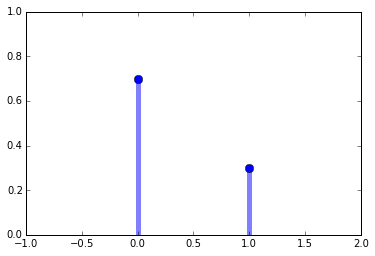

In [4]:
mu = 0.3
p = stats.bernoulli(mu)
xs = sp.array([0,1])

for x in xs:
  plt.plot(x, p.pmf(x), 'bo', ms=8, label='bernoulli pmf')
  plt.vlines(x, 0, p.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlim(xmin=-1, xmax=2)
plt.ylim(ymax=1)
plt.show()

In [5]:
X = p.rvs(size=100); X

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0])

In [6]:
sp.mean(X)

0.29999999999999999

In [7]:
sp.var(X)

0.20999999999999994

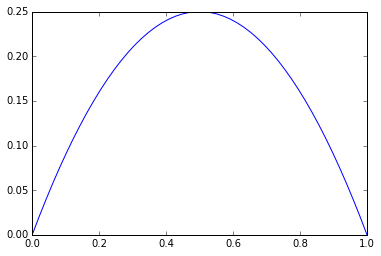

In [8]:
xs = linspace(0,1)
plt.plot(xs, xs * (1-xs));

### Kategorička ("multinomijalna") razdioba

* Varijabla koja poprima jednu (i samo jednu) od $K$ mogućih vrijednosti


* $\mathbf{x}=(x_1,x_2,\dots,x_K)^\mathrm{T}$ je binaran vektor indikatorskih varijabli
  * vektor 1-od-K
  * *one-hot encoding*

* Vjerojatnosti pojedinih vrijednosti: $\boldsymbol{\mu}=(\mu_1,\dots,\mu_K)^\mathrm{T}$, $\sum_k \mu_k=1$,  $\mu_k\geq 0$


\begin{equation*}
P(\mathbf{X}=\mathbf{x} | \boldsymbol{\mu}) = \prod_{k=1}^K \mu_k^{x_k}
\end{equation*}


* Npr. 
  * $X=x_3\quad \Rightarrow\quad \mathbf{x} = (0,0,1,0)$
  * $\boldsymbol{\mu} = (0.2, 0.3, 0.4, 0.1)$
  * $P\big(X = (0,0,1,0)\big) = \prod_{k=1}^4 \mu_k^{x_k} = 1\cdot 1\cdot \mu_3\cdot 1 = \mu_3 = 0.4$
  
### Gaussova razdioba

\begin{equation*}
p(X=x|\mu,\sigma^2) =
\frac{1}{\sqrt{2\pi}\sigma}\exp\Big\{-\frac{(x-\mu)^2}{2\sigma^2}\Big\}
\end{equation*}

\begin{align*}
\mathbb{E}[X] =& \mu\\
\mathrm{Var}(X) =& \sigma^2
\end{align*}



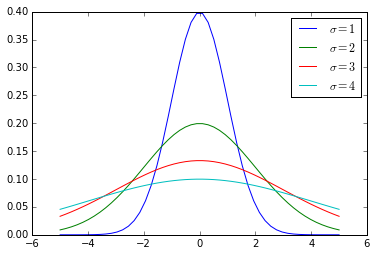

In [9]:
xs = sp.linspace(-5, 5)
for s in range(1, 5):
  plt.plot(xs, stats.norm.pdf(xs, 0, s), label='$\sigma=%d$' % s)
plt.legend()
plt.show()

* $P( \mu -\sigma\leq X \leq \mu + \sigma) = 0.68$
* $P( \mu -2\sigma\leq X \leq \mu + 2\sigma) = 0.95$
* $P( \mu -3\sigma\leq X \leq \mu + 3\sigma) = 0.99.7$

In [10]:
print stats.norm.cdf(1, 0, 1) - stats.norm.cdf(-1, 0, 1)
print stats.norm.cdf(2, 0, 1) - stats.norm.cdf(-2, 0, 1)
print stats.norm.cdf(3, 0, 1) - stats.norm.cdf(-3, 0, 1)

0.682689492137
0.954499736104
0.997300203937


In [11]:
p = stats.norm(loc=5, scale=3)

In [12]:
X = p.rvs(size=30); X

array([  3.94363136,   9.6884801 ,   6.73686697,   2.23918325,
        -0.22621627,   8.0346425 ,   7.50790913,   8.16860545,
         6.52408393,   5.5558834 ,   3.70190598,   1.00539899,
         5.33881857,   4.42657421,   8.26823883,   4.14257769,
        10.56845245,   6.31164921,   8.72326689,   6.81670834,
         9.6269925 ,   9.05832561,   5.89763569,   8.214693  ,
         5.37577967,   2.88912765,   2.47697932,   2.19650056,
         1.90620298,   1.09675323])

In [13]:
sp.mean(X)

5.5405217061730685

In [14]:
sp.var(X)

8.4165690464455274

### Multivarijatna Gaussova razdioba

\begin{equation*}
p(\mathbf{X}=\mathbf{x}|\boldsymbol{\mu},\mathbf{\Sigma}) = 
\frac{1}{(2\pi)^{n/2}|\mathbf{\Sigma}|^{1/2}}
\exp\Big\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\mathrm{T}\mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\Big\}
\end{equation*}


* $\mathbf{\Sigma}$ mora biti **pozitivno definitna**. Tada (1) matrica je nesingularna i ima inverz te (2) determinanta joj je pozitivna


* Kvadratna forma: $\Delta^2 = (\mathbf{x}-\boldsymbol{\mu})^\mathrm{T}\mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$ je **Mahalanobisova udaljenost** između $\mathbf{x}$ i $\boldsymbol{\mu}$.

\begin{align*}
\mathbb{E}[\mathbf{X}] =& \boldsymbol{\mu}\\
\mathrm{Cov}(X_i, X_j) =& \mathbf{\Sigma}_{ij}
\end{align*}



In [15]:
mu = [0, 1]
covm = sp.array([[1, 1], [1, 3]])
p = stats.multivariate_normal(mu, covm)

In [16]:
print covm

[[1 1]
 [1 3]]


In [17]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)
XY = np.dstack((X,Y))

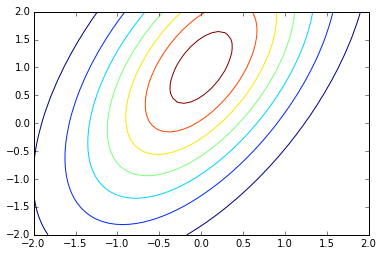

In [18]:
plt.contour(X, Y, p.pdf(XY));

In [19]:
covm1 = sp.array([[1, 0], [0, 5]])
print covm1

[[1 0]
 [0 5]]


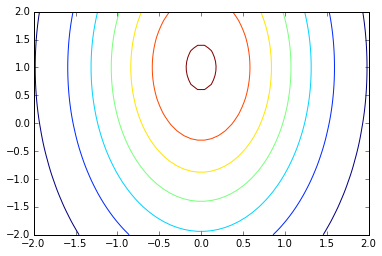

In [20]:
plt.contour(X, Y, stats.multivariate_normal.pdf(XY, mean=mu, cov=covm1 ));

In [21]:
covm2 = sp.array([[5, 0], [0, 5]])
print covm2

[[5 0]
 [0 5]]


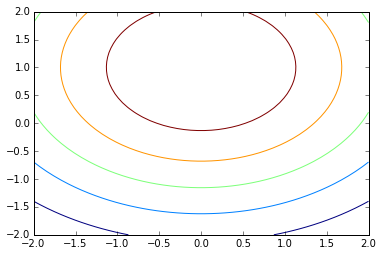

In [22]:
plt.contour(X, Y, stats.multivariate_normal.pdf(XY, mean=mu, cov=covm2 ));

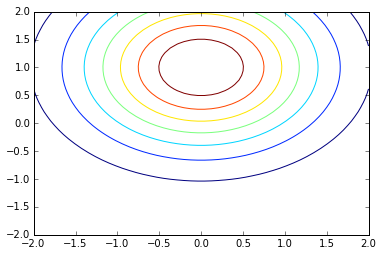

In [23]:
plt.contour(X, Y, stats.multivariate_normal.pdf(XY, mean=mu, cov=[[1,0],[0,1]] ));

In [24]:
from scipy import linalg
x00 = sp.array([0,0])
x01 = sp.array([0,1])
x10 = sp.array([1,0])
x11 = sp.array([1,1])

In [25]:
linalg.norm(x00 - x01, ord=2)

1.0

In [26]:
linalg.norm(x00 - x10, ord=2)

1.0

In [27]:
linalg.norm(x00 - x11, ord=2)

1.4142135623730951

In [28]:
sqrt(sp.dot((x00 - x11),(x00 - x11)))

1.4142135623730951

In [29]:
def mahalanobis(x1, x2, covm):
    return sqrt(sp.dot(sp.dot((x1 - x2), linalg.inv(covm)), (x1 - x2)))
# ili: from scipy.spatial.distance import mahalanobis

In [30]:
covm1 = sp.array([[1, 0], [0, 5]])
mahalanobis(x00, x01, covm1)

0.44721359549995793

In [31]:
mahalanobis(x00, x10, covm1)

1.0

In [32]:
mahalanobis(x00, x11, covm1)

1.0954451150103321

In [33]:
mahalanobis(x00, x11, sp.eye(2))

1.4142135623730951

# Procjena parametara

* Ideja: na temelju slučajnog uzorka izračunati procjenu (estimaciju) parametra teorijske razdiobe


* Neka je  $(X_1,X_2,\dots,X_n)$ uzorak ($n$-torka slučajnih varijabli koje su iid)


* Slučajna varijabla $\Theta=g(X_1,X_2,\dots,X_n)$ naziva se **statistika**


* Statistika $\Theta$ je **procjenitelj (estimator)** parametra populacije $\theta$


* Vrijednost procjenitelja $\hat{\theta} = g(x_1,x_2,\dots,x_n)$ naziva se **procjena**


* Procjenitelj je slučajna varijable, dakle ima očekivanje i varijancu


* [Slika: pristranost i varijanca procjenitelja]


* Procjenitelj $\Theta$ je **nepristran procjenitelj** (engl. *unbiased estimator*) parametra $\theta$ akko 
$$
\mathbb{E}[\Theta]=\theta
$$

* Pristranost procjenitelj (engl. *estimator bias*):
$$
b_\theta(\Theta) = \mathbb{E}[\Theta]-\theta
$$


### Primjer: Procjenitelji srednje vrijednosti i varijance

* $X$ je slučajna varijabla sa $x\in\mathbb{R}$.


* Označimo $\mathbb{E}[X] = \mu$ (srednja vrijednost) i
$\mathrm{Var}(X)=\sigma^2$ (varijanca)


* $\mu$ i $\sigma^2$ su parametri populacije i oni su nam nepoznati


* Parametre $\mu$ i $\sigma^2$ možemo ih procijeniti na temelju uzorka $\{x^{(i)}\}_{i=1}^N$ pomoću **procjenitelja**


* Za procjenitelje možemo upotrijebiti bilo koje statistike. Npr.
$$
\hat{\mu}=\frac{1}{N}\sum_i x^{(i)}\qquad
\hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^N (x^{(i)}-\hat{\mu})^2
$$


* Q: Jesu li ovo dobri procjenitelji? (Jesu li nepristrani?)


* $\mathbb{E}[\hat{\mu}]=\mu$ ?
* $\mathbb{E}[\hat{\sigma}^2] = \sigma^2$ ?



In [34]:
X = stats.norm.rvs(size=10, loc=0, scale=1) # mean=0, stdev=var=1
sp.mean(X)

0.042575400812075635

* Očekivanje procjenitelja:

In [35]:
mean = 0
n = 10
N = 10000
for i in range(N):
    X = stats.norm.rvs(size=n)
    mean += sp.sum(X) / len(X)
mean / N

0.0014897662030209388

* $\mathbb{E}[\hat{\mu}]=\mu$, tj. $\hat{\mu}$ je nepristran procjenitelj srednje
vrijednosti


* Međutim, $\mathbb{E}[\hat{\sigma}^2] \neq \sigma^2$, tj. $\hat{\sigma}^2$ **nije
nepristran** procjenitelj varijance!
$$
\mathbb{E}[\hat{\sigma}^2] = \frac{N-1}{N}\sigma^2
$$


* Pristranost od $\hat{\sigma}^2$ je 
$$
b(\hat{\sigma}^2) = \frac{N-1}{N}\sigma^2-\sigma^2 =
-\frac{\sigma^2}{N}
$$


* Procjenitelj **podcjenjuje** (engl. *underestimates*) pravu varijancu!


* Nepristran procjenitelj varijance:
$$
\hat{\sigma}^2_{\text{nepr.}} = \frac{1}{N-1}\sum_{i=1}^N (x^{(i)}-\hat{\mu})^2
$$ 



In [36]:
def st_dev(X): 
    n = len(X)
    mean = sp.sum(X) / n
    s = 0
    for i in range(len(X)):
        s += (X[i] - mean)**2
    return s / n

In [37]:
X = stats.norm.rvs(size=10, loc=0, scale=1) # mean=0, stdev=var=1
st_dev(X)

0.62610770360872903

* Očekivanje procjenitelja:

In [38]:
stdev = 0
n = 10
N = 10000
for i in range(N):
    X = stats.norm.rvs(size=n)
    stdev += st_dev(X)
stdev / N

0.90251698503102884

In [39]:
stdev = 0
n = 10
N = 10000
for i in range(N):
    X = stats.norm.rvs(size=n)
    stdev += st_dev(X)
stdev / N

0.90865744695623196

* Kako izvesti procjenitelj za neku teorijsku distribuciju (Bernoullijevu, Gaussovu, ...)?


* Tri vrste procjenitelja:
  * (1) **Procjenitelj najveće izglednosti** (engl. *maximum likelihood estimator*, MLE)
  * (2) **Procjenitelj maximum aposteriori** (MAP)
  * (3) **Bayesovski procjenitelj** (engl. *Bayesian estimator*)

# Procjenitelj MLE

* Skup neoznačenih primjera $\mathcal{D}=\{\mathbf{x}^{(i)}\}_{i=1}^N$ koji su **iid**

$$
\mathbf{x}^{(i)} \sim p(\mathbf{x} | \boldsymbol{\theta})
$$


* MLE određuje **najizglednije** parametre $\boldsymbol{\theta}$: to su oni parametri koji
izvlačenje uzorka $\mathcal{D}$ čine **najvjerojatnijim**
$$
 p(\mathcal{D} | \boldsymbol{\theta}) = 
 p(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(N)} | \mathbf{\theta}) = 
\prod_{i=1}^N p(\mathbf{x}^{(i)} | \mathbf{\theta})\ 
\equiv \color{red}{\mathcal{L}(\boldsymbol{\theta} | \mathcal{D})}
$$
NB: Druga jednakost vrijedi uz pretpostavku **iid**


* **Funkcija izglednosti** $\mathcal{L} : \boldsymbol{\theta}\mapsto p(\mathcal{D} | \boldsymbol{\theta})$ parametrima pridjeljuje vjerojatnost


* $\mathcal{L}$ nije PDF! Općenito ne vrijedi $\int_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}|\mathcal{D})\,\mathrm{d}\boldsymbol{\theta}=1$.



### Primjer: Izglednost Bernoullijeve varijable

* $\mathcal{D} \equiv$ 10 bacanja novčića ($N=10$)
* Glava (H) 8 puta, pismo (T) 2 puta
* $\mu$ je vjerojatnost da dobijem H
* $P(X=x | \mu)= \mu^{x}(1-\mu)^{1-x}$


In [40]:
def likelihood(mu, m, N):
    return mu**m * (1 - mu)**(N - m)

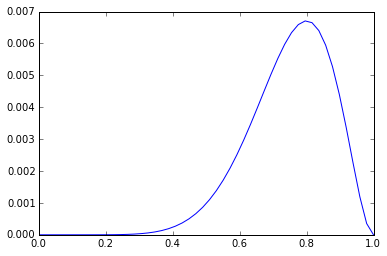

In [41]:
xs = linspace(0,1)
plt.plot(xs, likelihood(xs, 8, 10));

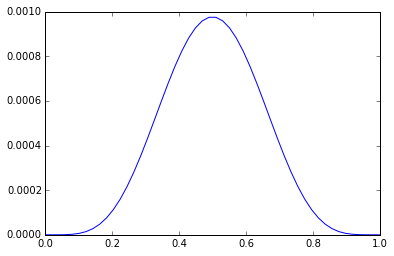

In [42]:
xs = linspace(0,1)
plt.plot(xs, likelihood(xs, 5, 10));

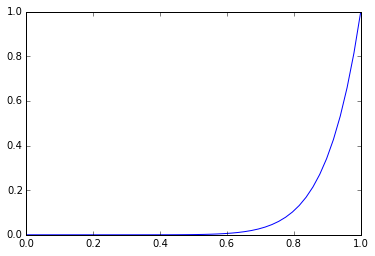

In [43]:
xs = linspace(0,1)
plt.plot(xs, likelihood(xs, 10, 10));

### MLE

* Nalazi $\boldsymbol{\theta}$ koji maksimiziraju funkciju izglednosti: 

$$
\hat{\boldsymbol{\theta}}_{\mathrm{ML}} = \mathrm{argmax}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}|\mathcal{D})
$$


* Analitički je jednostavnije maksimizirati **log-izglednost**:
$$
\ln\mathcal{L}(\boldsymbol{\theta} | \mathcal{D}) \ = \ln p(\mathcal{D} | \boldsymbol{\theta}) =
\ln \prod_{i=1}^N p(\mathbf{x}^{(i)} | \boldsymbol{\theta}) = 
\sum_{i=1}^N\ln p(\mathbf{x}^{(i)} | \boldsymbol{\theta})
$$

$$
\hat{\boldsymbol{\theta}}_{\mathrm{ML}} = \mathrm{argmax}_{\boldsymbol{\theta}} \big(\ln \mathcal{L}\big(\boldsymbol{\theta}|\mathcal{D})\big)
$$

* Ako je moguće, maksimizaciju provodimo analitički, inače je provodimo iterativnim metodama

### MLE za Bernoullijevu razdiobu (parametar: $\mu$)

\begin{align*}
    \ln\mathcal{L}(\mu | \mathcal{D}) &=
\ln\prod_{i=1}^N P(x | \mu) =
\ln\prod_{i=1}^N \mu^{x^{(i)}}(1-\mu)^{1-x^{(i)}}\\
&=\sum_{i=1}^N x^{(i)}\ln \mu + \Big(N-\sum_{i=1}^N x^{(i)}\Big)\ln(1-\mu)
\end{align*}

$$
\frac{\mathrm{d}\,{\ln\mathcal{L}}}{\mathrm{d}\mu} =
\frac{1}{\mu}\sum_{i=1}^N x^{(i)} - \frac{1}{1-\mu}\Big(N-\sum_{i=1}^N x^{(i)}\Big) = 0
$$

\begin{equation*}
\Rightarrow\quad \hat{\mu}_\mathrm{ML} = \frac{1}{N}\sum_{i=1}^N x^{(i)}
\end{equation*}


* MLE za Bernoullijevu razdiobu je ustvari **relativna frekvencija**


* Vrijedi $\mathbb{E}(\mu_\mathrm{ML})=\mathbb{E}[X]=\mu$, pa je ovo je nepristran procjenitelj

### MLE za kategoričku razdiobu (parametri: $\mu_k$)

\begin{align*}
\ln\mathcal{L}(\boldsymbol{\mu} | \mathcal{D}) =
\ln\prod_{i=1}^N P(\mathbf{x}^{(i)} | \boldsymbol{\mu}) = 
\ln\prod_{i=1}^N \color{red}{\prod_{k=1}^K \mu_k^{x_k^{(i)}}} =
\sum_{k=1}^K \sum_{i=1}^N x_k^{(i)} \ln \mu_k
\end{align*}


* Izraz treba maksimizirati prema $\mu_k$ uz **ograničenje** $\sum_{k=1}^K\mu_k=1$.


* Primjenom **metode Lagrangeovih multiplikatora** dobivamo:
$$
\hat{\mu}_{k,\mathrm{ML}} = \frac{1}{N}\sum_{i=1}^N x_k^{(i)} = \frac{N_k}{N}
$$
$N_k$ je broj nastupanja k-te vrijednosti


### MLE za Gaussovu razdiobu (parametri: $\mu, \sigma^2$)

\begin{align*}
\ln\mathcal{L}(\mu,\sigma^2 | \mathcal{D}) &= 
\ln\prod_{i=1}^N
 \frac{1}{\sqrt{2\pi}\sigma}\exp\Big\{-\frac{(x^{(i)}-\mu)^2}{2\sigma^2}\Big\} \\
&= -\frac{N}{2}\ln(2\pi) 
  - N\ln\sigma 
  - \frac{\sum_i(x^{(i)}-\mu)^2}{2\sigma^2}\\
\end{align*}

\begin{align*}
\nabla\ln\mathcal{L}(\mu,\sigma^2 | \mathcal{D})&=0\\
\vdots\\
\hat{\mu}_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N x^{(i)}\\
\hat{\sigma}^2_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N(x^{(i)}-\hat{\mu}_\mathrm{ML})^2
\end{align*}


* NB: Procjenitelj $\hat{\sigma}^2_\mathrm{ML}$ je pristran!


* MLE ne mora nužno biti nepristran!

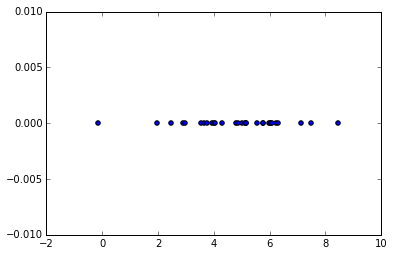

In [44]:
p = stats.norm(5, 2)
X = sort(p.rvs(30))
plt.scatter(X, sp.zeros(len(X)));

In [45]:
mean_mle = sp.mean(X); mean_mle

4.8057053896461506

In [46]:
var_mle = np.var(X, axis=0, ddof=1); var_mle

3.1111795224611711

In [47]:
p_mle = stats.norm(mean_mle, sqrt(var_mle))

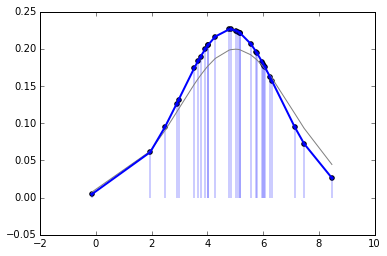

In [48]:
plt.scatter(X, p_mle.pdf(X))
plt.plot(X, p.pdf(X), c='gray');
plt.plot(X, p_mle.pdf(X), c='blue', linewidth=2)
plt.vlines(X, 0, p_mle.pdf(X), colors='b', lw=2, alpha=0.2)
plt.show()

### MLE za multivarijatnu Gaussovu razdiobu

\begin{align*}
\ln\mathcal{L}(\boldsymbol{\mu},\boldsymbol{\Sigma}|\mathcal{D}) &=
\ln\prod_{i=1}^N
p(\mathbf{x}^{(i)}|\boldsymbol{\mu},\boldsymbol{\Sigma})\\
&=
-\frac{n N}{2}\ln(2\pi)-\frac{N}{2}|\boldsymbol{\Sigma}|
-\frac{1}{2}\sum_{i=1}^N(\boldsymbol{x}^{(i)}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\mathbf{x}^{(i)}-\boldsymbol{\mu})
\end{align*}

\begin{align*}
    \nabla\ln\mathcal{L}(\boldsymbol{\mu},\boldsymbol{\Sigma} | \mathcal{D})&=0\\
\vdots\\
    \hat{\boldsymbol{\mu}}_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N\mathbf{x}^{(i)}\\
   \hat{\boldsymbol{\Sigma}}_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N
(\mathbf{x}^{(i)}-\hat{\boldsymbol{\mu}}_\mathrm{ML})(\mathbf{x}^{(i)}-\hat{\boldsymbol{\mu}}_\mathrm{ML})^\mathrm{T}
\end{align*}


In [60]:
mu = [3, 2]
covm = sp.array([[5, 2], [2, 10]])
p = stats.multivariate_normal(mu, covm)

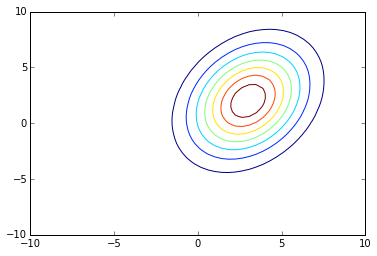

In [61]:
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X, Y = np.meshgrid(x, y)
XY = np.dstack((X,Y))
plt.contour(X, Y, p.pdf(XY))
plt.show()

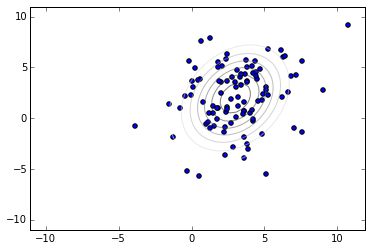

In [62]:
D = p.rvs(100)
plt.contour(X, Y, p.pdf(XY), cmap='binary', alpha=0.5)
plt.scatter(D[:,0], D[:,1])
plt.show()

In [63]:
mean_mle = sp.mean(D, axis=0); mean_mle

array([ 3.10940042,  2.13853873])

In [64]:
cov_mle = 0
s = 0
for x in D:
    s += sp.outer(x - mean_mle, x - mean_mle)
cov_mle = s / len(D)

In [65]:
cov_mle

array([[ 5.36556926,  1.61872328],
       [ 1.61872328,  9.05445152]])

In [66]:
sp.cov(D, rowvar=0, bias=0)

array([[ 5.41976693,  1.63507402],
       [ 1.63507402,  9.14591063]])

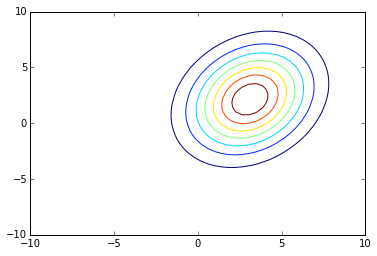

In [67]:
p_mle = stats.multivariate_normal(mean_mle, cov_mle)
plt.contour(X, Y, p_mle.pdf(XY));

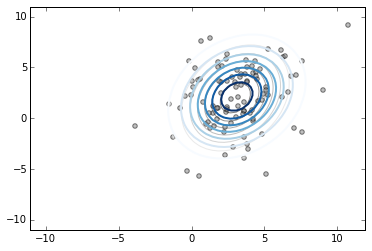

In [68]:
plt.contour(X, Y, p.pdf(XY), cmap='binary', alpha=0.5)
plt.scatter(D[:,0], D[:,1], c='gray', alpha=0.5)
plt.contour(X, Y, p_mle.pdf(XY), cmap='Blues', linewidths=2);

# Procjenitelj MAP

* MLE lako dovodi do **prenaučenosti** modela
  * Npr. za skup primjera za koji $\forall x^{(i)}\in \mathcal{D}. x^{(i)}=0$, procjena je $\hat{\mu}_\mathrm{ML}=0$


* Ideja: nisu sve vrijednosti za $\mu$ jednako vjerojatne!


* Definiramo **apriornu razdiobu parametra** $p(\boldsymbol{\theta})$ i zatim maksimiziramo 
aposteriornu vjerojatnost:
$$
    p(\boldsymbol{\theta}|\mathcal{D}) =
\frac{p(\mathcal{D}|\boldsymbol{\theta}) P(\boldsymbol{\theta})} {p(\mathcal{D})}
$$


* MLE:
$$
\hat{\boldsymbol{\theta}} = \mathrm{argmax}_{\boldsymbol{\theta}}\ \mathcal{L}(\boldsymbol{\theta}|\mathcal{D})
$$


* MAP:
$$
    \hat{\mathbf{\theta}}_\mathrm{MAP} = \mathrm{argmax}_{\boldsymbol{\theta}} \ p(\boldsymbol{\theta}|\mathcal{D}) =
    p(\mathcal{D}|\boldsymbol{\theta})\,\color{red}{p(\boldsymbol{\theta})}
$$


### Procjenitelj MAP za Bernoullijevu varijablu

In [ ]:
TODO

In [4]:
xs = sp.linspace(0,1)
beta = stats.beta(1,1)

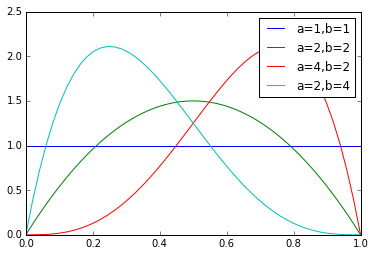

In [30]:
plt.plot(xs,stats.beta.pdf(xs,1,1), label='a=1,b=1')
plt.plot(xs,stats.beta.pdf(xs,2,2), label='a=2,b=2')
plt.plot(xs,stats.beta.pdf(xs,4,2), label='a=4,b=2')
plt.plot(xs,stats.beta.pdf(xs,2,4), label='a=2,b=4')
plt.legend()
plt.show()

### Laplaceovo zaglađivanje

TODO

# Sažetak

* Za strojno učenje posebno su važne **Bernoullijeva**, **kategorička** i **Gaussova** razdioba


* **Procjenitelj** je statistika (slučajna varijabla izračunata iz uzorka) kojom se procjenjuju parametri neke teorijske razdiobe


* Dobri procjenitelju su **nepristrani**


* **Procjenitelj najveće izglednosti (MLE)** odabire parametre koji maksimiziraju vjerojatnost realizacije uzorka (tzv. izglednost)


* MLE procjenitelj nije uvijek nepristran i sklon je prenaučenosti


* **MAP-procjenitelj ** dodatno koristi apriornu razdiobu parametara i maksimizira aposteriornu vjerojatnost parametara
        
        
* MAP-procjenitelj na taj način ugrađuje apriorno znanje te izbjegava prenaučenost samo na temelju podataka